# **Exploratory Data Analysis of Cardio Activities**

## **Intro**
Welcome to the exploration of cardio activities through a comprehensive dataset capturing the essence of our physical pursuits. In this notebook, we delve into a treasure trove of information, tracking the nuances of our cardio endeavors. The dataset unfolds a narrative of dates, workout types, distances conquered, durations endured, and the physiological responses that accompany each heartbeat.<br>
The goal is to uncover insights and answer several intriguing questions about cardio activities.

1. How does the frequency of workouts change over the period of time?
2. Are there specific days of the week or months when certain types of workouts are more common?
3. What are the most common types of workouts recorded in the dataset?
4. Is there a correlation between workout type and factors like distance, duration, or calories burned?
5. How does the average pace and speed vary across different workout types?
6. Is there a relationship between pace/speed and other variables like distance or climb?
7. What is the distribution of calories burned across different durations?
8. Is there a correlation between climb and calories burned?
9. How does the average heart rate vary for different types of workouts?
10. Are there patterns in heart rate concerning duration, distance, or climb?
11. How does the duration of workouts relate to the distance covered?
12. Are there outliers where shorter workouts cover longer distances or vice versa?
13. Are there strong correlations among distance, calories burned, pace and heart rate?

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#data input
data = pd.read_csv("/kaggle/input/cardio-activities/cardioActivities.csv")
data.head(5)

,Date,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
0,2018-11-11 14:05:12,c9627fed-14ac-47a2-bed3-2a2630c63c15,Running,NaN,10.44,58:40,5:37,10.68,774.0,130,159.0,NaN,NaN,2018-11-11-140512.gpx
1,2018-11-09 15:02:35,be65818d-a801-4847-a43b-2acdf4dc70e7,Running,NaN,12.84,1:14:12,5:47,10.39,954.0,168,159.0,NaN,NaN,2018-11-09-150235.gpx
2,2018-11-04 16:05:00,c09b2f92-f855-497c-b624-c196b3ef036c,Running,NaN,13.01,1:15:16,5:47,10.37,967.0,171,155.0,NaN,NaN,2018-11-04-160500.gpx
3,2018-11-01 14:03:58,bc9b612d-3499-43ff-b82a-9b17b71b8a36,Running,NaN,12.98,1:14:25,5:44,10.47,960.0,169,158.0,NaN,NaN,2018-11-01-140358.gpx
4,2018-10-27 17:01:36,972567b2-1b0e-437c-9e82-fef8078d6438,Running,NaN,13.02,1:12:50,5:36,10.73,967.0,170,154.0,NaN,NaN,2018-10-27-170136.gpx


In [3]:
data.shape

(508, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      508 non-null    object 
 1   Activity Id               508 non-null    object 
 2   Type                      508 non-null    object 
 3   Route Name                1 non-null      object 
 4   Distance (km)             508 non-null    float64
 5   Duration                  508 non-null    object 
 6   Average Pace              508 non-null    object 
 7   Average Speed (km/h)      508 non-null    float64
 8   Calories Burned           508 non-null    float64
 9   Climb (m)                 508 non-null    int64  
 10  Average Heart Rate (bpm)  294 non-null    float64
 11  Friend's Tagged           0 non-null      float64
 12  Notes                     231 non-null    object 
 13  GPX File                  504 non-null    object 
dtypes: float64

In [5]:
# dealing with date and time data, splitting the data into dates and time separately
data['Date'] = pd.to_datetime(data['Date'])
data['WorkoutCalendar'] = data['Date'].dt.date
data['WorkoutTimestamp'] = data['Date'].dt.time

data['WorkoutDate'] = data['Date'].dt.day
data['WorkoutMonth'] = data['Date'].dt.month
data['WorkoutYear'] = data['Date'].dt.year

data['WorkoutYM'] = data.apply(lambda row: f"{row['WorkoutYear']}-{row['WorkoutMonth']}", axis=1)

data['WorkoutDay'] = data['Date'].dt.day_name()

data.head(5)

,Date,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),...,Friend's Tagged,Notes,GPX File,WorkoutCalendar,WorkoutTimestamp,WorkoutDate,WorkoutMonth,WorkoutYear,WorkoutYM,WorkoutDay
0,2018-11-11 14:05:12,c9627fed-14ac-47a2-bed3-2a2630c63c15,Running,NaN,10.44,58:40,5:37,10.68,774.0,130,...,NaN,NaN,2018-11-11-140512.gpx,2018-11-11,14:05:12,11,11,2018,2018-11,Sunday
1,2018-11-09 15:02:35,be65818d-a801-4847-a43b-2acdf4dc70e7,Running,NaN,12.84,1:14:12,5:47,10.39,954.0,168,...,NaN,NaN,2018-11-09-150235.gpx,2018-11-09,15:02:35,9,11,2018,2018-11,Friday
2,2018-11-04 16:05:00,c09b2f92-f855-497c-b624-c196b3ef036c,Running,NaN,13.01,1:15:16,5:47,10.37,967.0,171,...,NaN,NaN,2018-11-04-160500.gpx,2018-11-04,16:05:00,4,11,2018,2018-11,Sunday
3,2018-11-01 14:03:58,bc9b612d-3499-43ff-b82a-9b17b71b8a36,Running,NaN,12.98,1:14:25,5:44,10.47,960.0,169,...,NaN,NaN,2018-11-01-140358.gpx,2018-11-01,14:03:58,1,11,2018,2018-11,Thursday
4,2018-10-27 17:01:36,972567b2-1b0e-437c-9e82-fef8078d6438,Running,NaN,13.02,1:12:50,5:36,10.73,967.0,170,...,NaN,NaN,2018-10-27-170136.gpx,2018-10-27,17:01:36,27,10,2018,2018-10,Saturday


In [6]:
# find timestamps with only minutes and seconds
mask = data['Duration'].apply(lambda x: len(x.split(':')) == 2)

# add "00:" in front of those values
data.loc[mask, 'Duration'] = '00:' + data.loc[mask, 'Duration']

data[['Hour', 'Minute', 'Second']] = data['Duration'].str.split(':', expand=True)
data[['Hour', 'Minute', 'Second']] = data[['Hour', 'Minute', 'Second']].astype(int)

data['WorkoutDuration'] = data['Hour']*3600 + data['Minute']*60 + data['Second']
data['WorkoutDuration']

0      3520
1      4452
2      4516
3      4465
4      4370
       ... 
503     819
504    1076
505     823
506     960
507    1868
Name: WorkoutDuration, Length: 508, dtype: int64

In [7]:
data[['MinutePace', 'SecondPace']] = data['Average Pace'].str.split(':', expand=True)
data[['MinutePace', 'SecondPace']] = data[['MinutePace', 'SecondPace']].astype(int)

data['WorkoutPace'] = data['MinutePace']*60 + data['SecondPace']
data['WorkoutPace']

0      337
1      347
2      347
3      344
4      336
      ... 
503    521
504    729
505    554
506    305
507    329
Name: WorkoutPace, Length: 508, dtype: int64

In [8]:
mean_value = data['Average Heart Rate (bpm)'].mean()
data['Average Heart Rate (bpm)'].fillna(value=mean_value, inplace=True)

In [9]:
data.isnull().sum()

Date                          0
Activity Id                   0
Type                          0
Route Name                  507
Distance (km)                 0
Duration                      0
Average Pace                  0
Average Speed (km/h)          0
Calories Burned               0
Climb (m)                     0
Average Heart Rate (bpm)      0
Friend's Tagged             508
Notes                       277
GPX File                      4
WorkoutCalendar               0
WorkoutTimestamp              0
WorkoutDate                   0
WorkoutMonth                  0
WorkoutYear                   0
WorkoutYM                     0
WorkoutDay                    0
Hour                          0
Minute                        0
Second                        0
WorkoutDuration               0
MinutePace                    0
SecondPace                    0
WorkoutPace                   0
dtype: int64

In [10]:
data = data[['Activity Id', 'Type', 'Distance (km)', 'WorkoutDuration', 'WorkoutPace', 'Average Speed (km/h)', 'Calories Burned', 'Climb (m)', 'Average Heart Rate (bpm)', 'WorkoutTimestamp', 'WorkoutDate', 'WorkoutMonth', 'WorkoutYear', 'WorkoutDay', 'WorkoutYM']]
data.head(5)

,Activity Id,Type,Distance (km),WorkoutDuration,WorkoutPace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),WorkoutTimestamp,WorkoutDate,WorkoutMonth,WorkoutYear,WorkoutDay,WorkoutYM
0,c9627fed-14ac-47a2-bed3-2a2630c63c15,Running,10.44,3520,337,10.68,774.0,130,159.0,14:05:12,11,11,2018,Sunday,2018-11
1,be65818d-a801-4847-a43b-2acdf4dc70e7,Running,12.84,4452,347,10.39,954.0,168,159.0,15:02:35,9,11,2018,Friday,2018-11
2,c09b2f92-f855-497c-b624-c196b3ef036c,Running,13.01,4516,347,10.37,967.0,171,155.0,16:05:00,4,11,2018,Sunday,2018-11
3,bc9b612d-3499-43ff-b82a-9b17b71b8a36,Running,12.98,4465,344,10.47,960.0,169,158.0,14:03:58,1,11,2018,Thursday,2018-11
4,972567b2-1b0e-437c-9e82-fef8078d6438,Running,13.02,4370,336,10.73,967.0,170,154.0,17:01:36,27,10,2018,Saturday,2018-10


In [11]:
data = data.rename(columns={"Activity Id":"ActivityId","Distance (km)":"Distance","Average Speed (km/h)":"AverageSpeed", "Climb (m)":"Climb", "Average Heart Rate (bpm)":"AverageHeartRate", "Calories Burned":"CaloriesBurned"})

### 1. How does the frequency of workouts change over the period of time?

<function matplotlib.pyplot.show(close=None, block=None)>

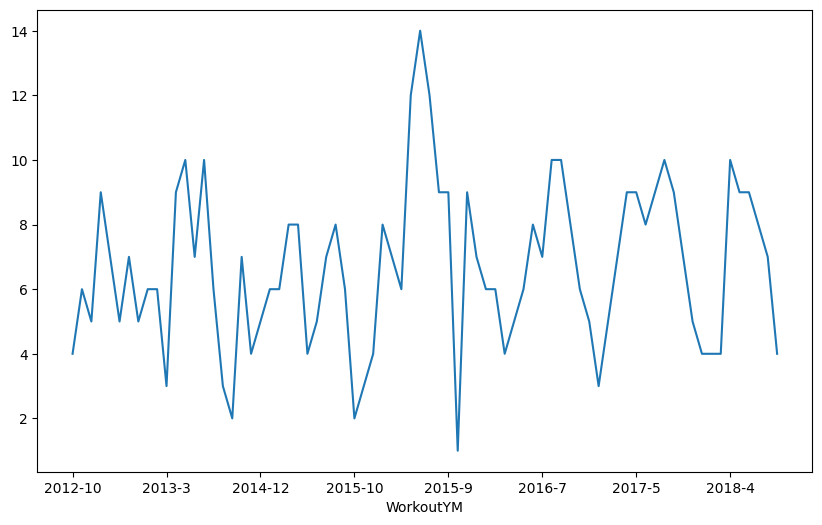

In [12]:
freqWorkout = data['WorkoutYM'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
freqWorkout.plot(kind='line')
plt.show

### 2. Are there specific days of the week or months when certain types of workouts are more common?

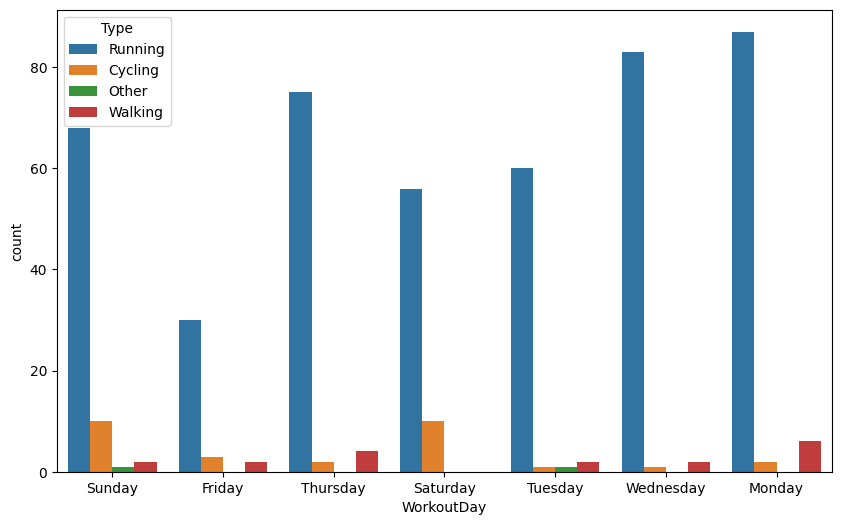

In [13]:
#for specific days
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='WorkoutDay', hue='Type', data=data)

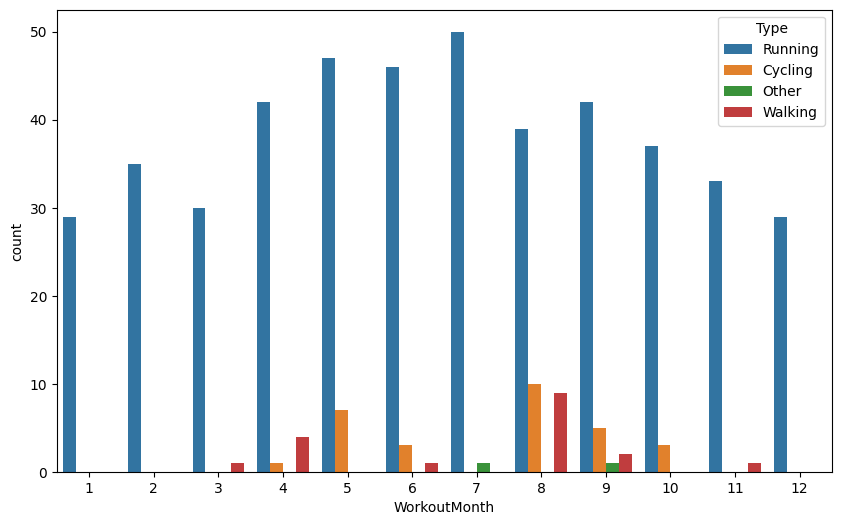

In [14]:
#for specific months
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='WorkoutMonth', hue='Type', data=data)

### 3. What are the most common types of workouts recorded in the dataset?

In [15]:
sizes = data['Type'].value_counts()

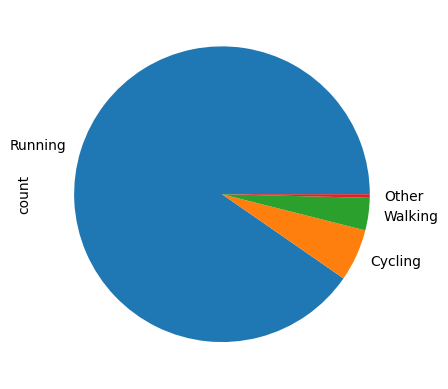

In [16]:
sizes.plot(kind='pie')
plt.show()

### 4. Is there a correlation between workout type and factors like distance, duration, or calories burned?

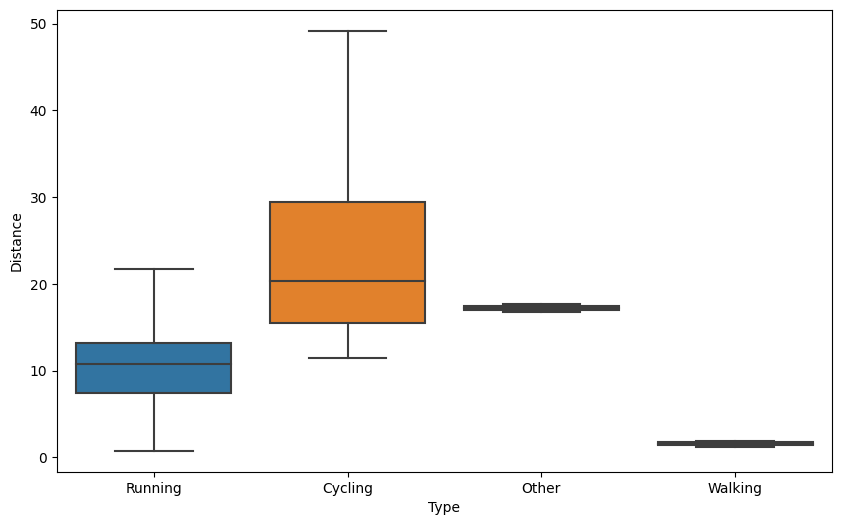

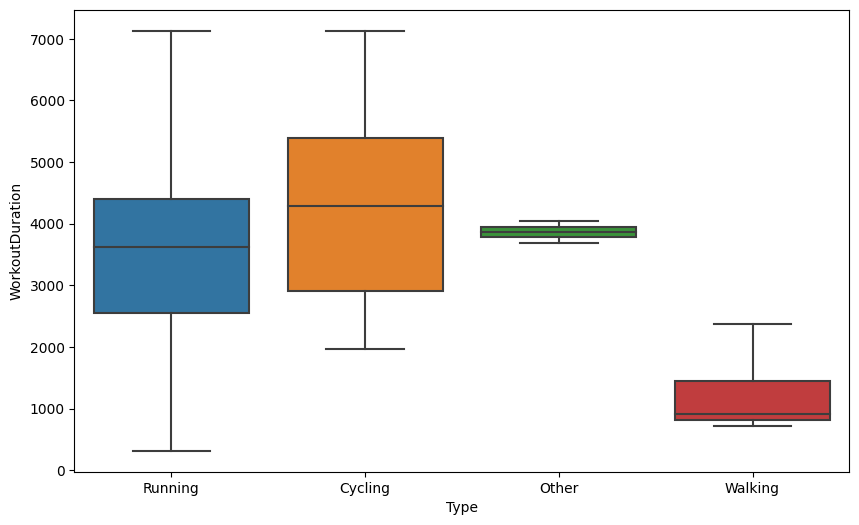

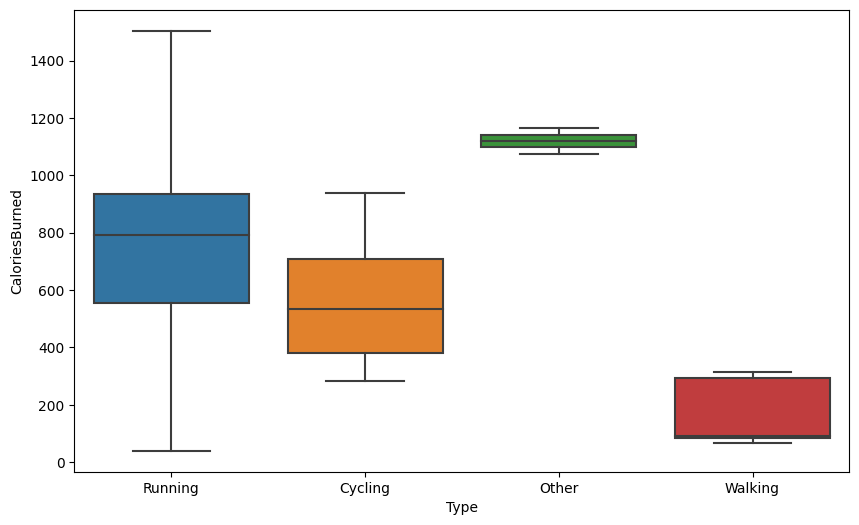

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Distance', data=data, showfliers=False)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='WorkoutDuration', data=data, showfliers=False)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='CaloriesBurned', data=data, showfliers=False)
plt.show()

### 5. How does the average pace and speed vary across different workout types?

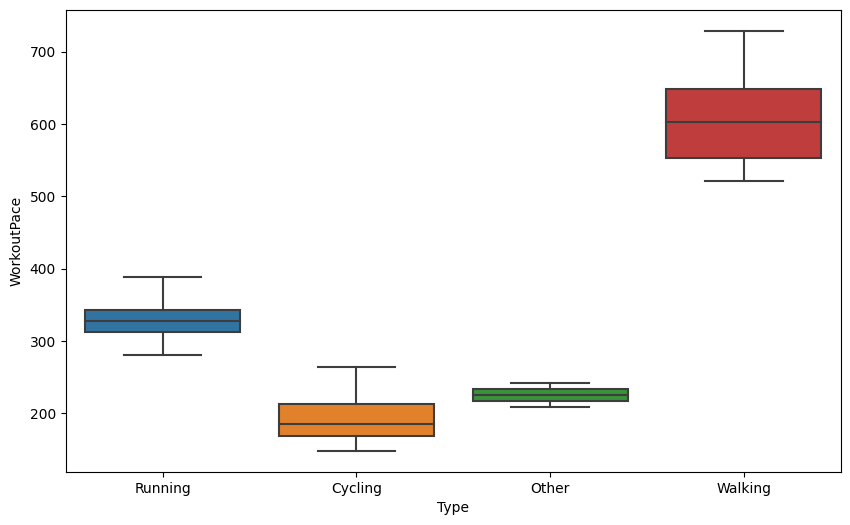

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='WorkoutPace', data=data, showfliers=False)
plt.show()

### 6. Is there a relationship between pace/speed and distance and climb?

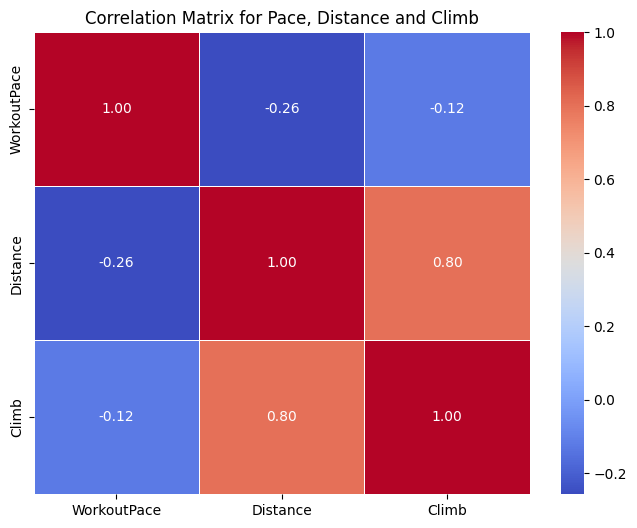

In [19]:
# for pace
data[['WorkoutPace', 'Distance', 'Climb']] = data[['WorkoutPace', 'Distance', 'Climb']].apply(pd.to_numeric)
speeddata = data[['WorkoutPace', 'Distance', 'Climb']]
correlation_matrix = speeddata.corr()

# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# title
plt.title('Correlation Matrix for Pace, Distance and Climb')

plt.show()

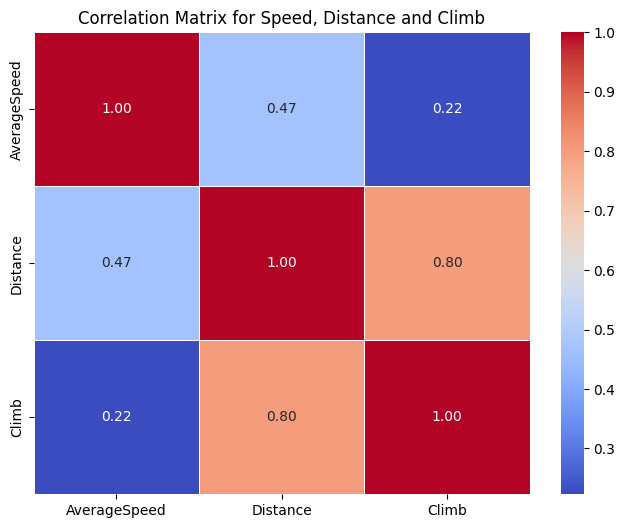

In [20]:
# for speed
data[['AverageSpeed', 'Distance', 'Climb']] = data[['AverageSpeed', 'Distance', 'Climb']].apply(pd.to_numeric)
speeddata = data[['AverageSpeed', 'Distance', 'Climb']]
correlation_matrix = speeddata.corr()

# heatmp
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# title
plt.title('Correlation Matrix for Speed, Distance and Climb')

plt.show()

### 7. What is the distribution of calories burned across different durations?

Text(0.5, 1.0, 'Distribution of Calories burned across different durations')

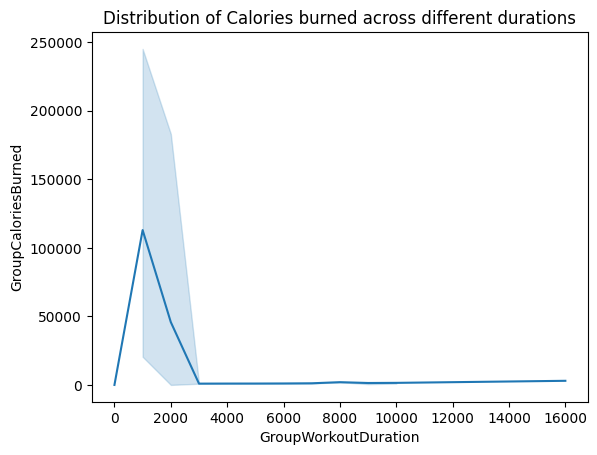

In [21]:
data['GroupWorkoutDuration'] = round(data['WorkoutDuration'], -3)
data['GroupCaloriesBurned'] = round(data['CaloriesBurned'], -3)
sns.lineplot(x='GroupWorkoutDuration', y='GroupCaloriesBurned', data=data)
plt.title('Distribution of Calories burned across different durations')

### 8. Is there a correlation between climb and calories burned?

In [22]:
correlation = round(data['Climb'].corr(data['CaloriesBurned']), 2)
print(f"Correlation between Climb and Calories burned: {correlation}")

Correlation between Climb and Calories burned: -0.08


### 9. How does the average heart rate vary for different types of workouts?

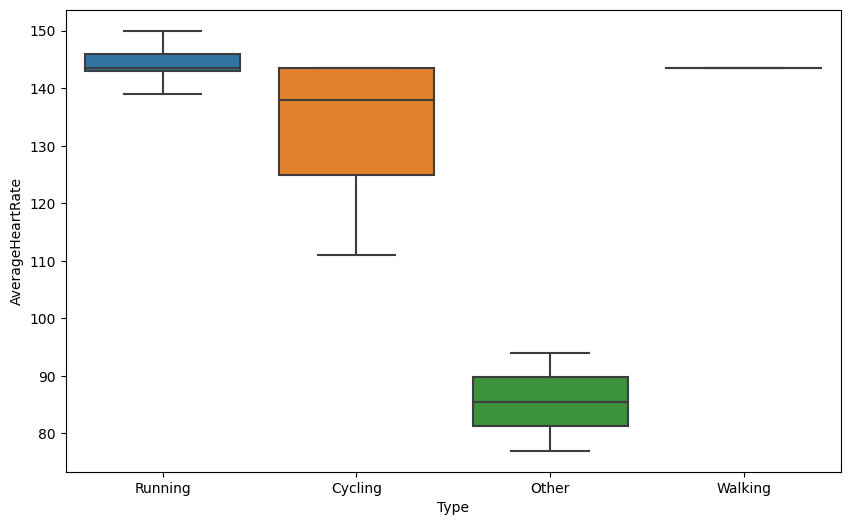

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='AverageHeartRate', data=data, showfliers=False)
plt.show()

### 10. Are there patterns in heart rate concerning duration, distance, or climb?

<Axes: xlabel='AverageHeartRate', ylabel='WorkoutDuration'>

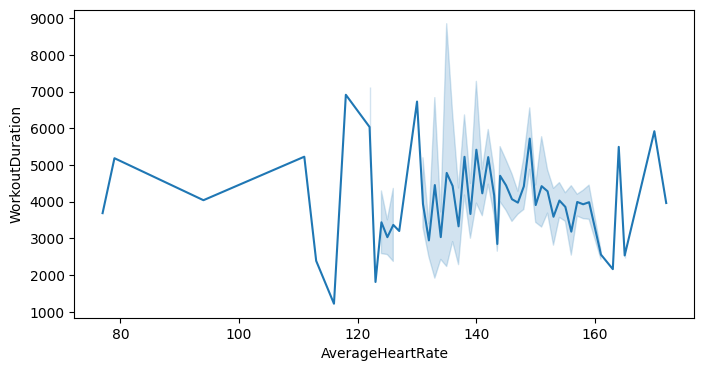

In [24]:
plt.figure(figsize=(8, 4))
data['GroupHeartRate'] = round(data['AverageHeartRate'], 0)
data['GroupDuration'] = round(data['WorkoutDuration'],-1)
sns.lineplot(x='AverageHeartRate', y='WorkoutDuration', data=data)

<Axes: xlabel='AverageHeartRate', ylabel='Distance'>

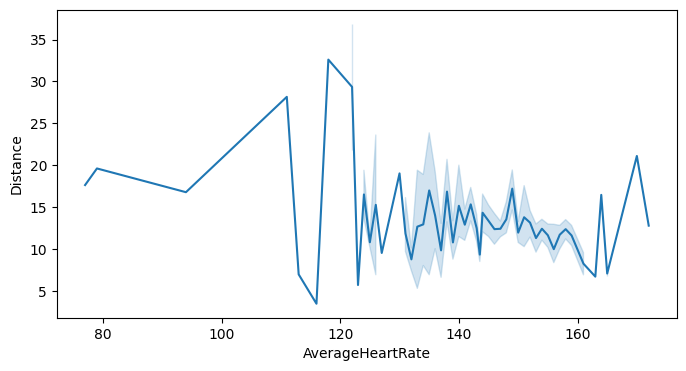

In [25]:
plt.figure(figsize=(8, 4))
sns.lineplot(x='AverageHeartRate', y='Distance', data=data)

<Axes: xlabel='AverageHeartRate', ylabel='Climb'>

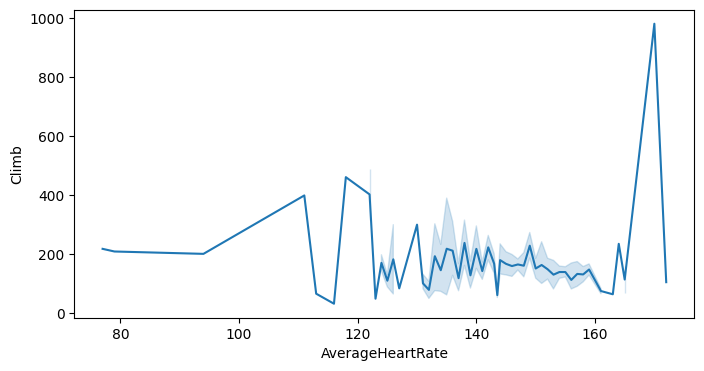

In [26]:
plt.figure(figsize=(8, 4))
sns.lineplot(x='AverageHeartRate', y='Climb', data=data)

### 11. How does the duration of workouts relate to the distance covered? 

<Axes: xlabel='Distance', ylabel='WorkoutDuration'>

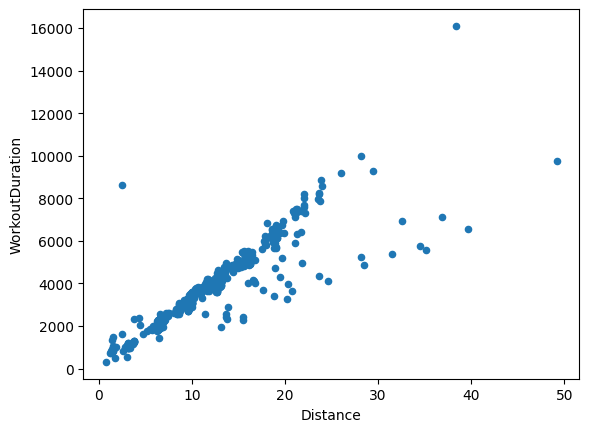

In [27]:
data.plot.scatter(x='Distance', y='WorkoutDuration')

### 12. Are there outliers where shorter workouts cover longer distances or vice versa?

<Axes: xlabel='Distance', ylabel='WorkoutDuration'>

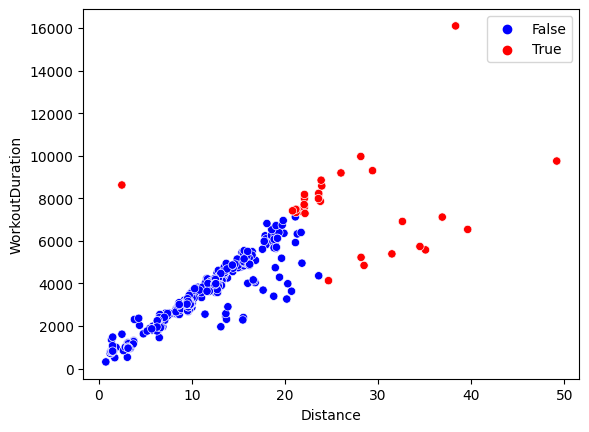

In [28]:
new_data = data[['Distance', 'WorkoutDuration']]
# z-scores
z_scores = (new_data - new_data.mean()) / new_data.std()

# threshold for z-scores to identify outliers
z_threshold = 2
sns.scatterplot(x='Distance', y='WorkoutDuration', data=data, hue=(z_scores > z_threshold).any(axis=1), palette=['blue', 'red'])

### 13. Are there strong correlations among distance, calories burned, pace and heart rate?

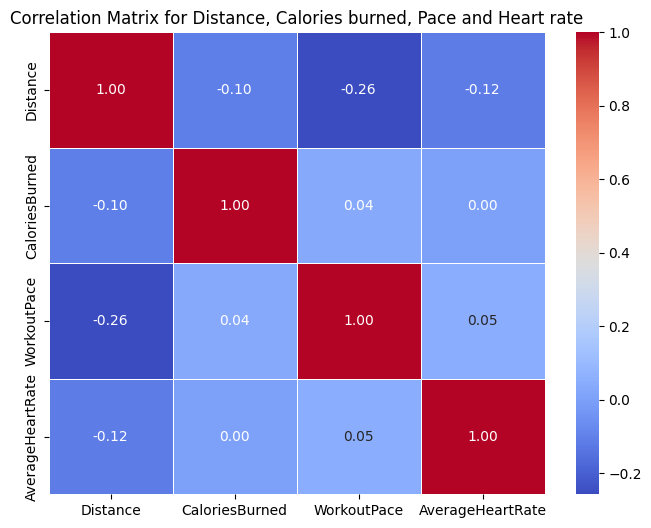

In [29]:
data[['Distance', 'CaloriesBurned', 'WorkoutPace','AverageHeartRate']] = data[['Distance', 'CaloriesBurned', 'WorkoutPace','AverageHeartRate']].apply(pd.to_numeric)
corrdata = data[['Distance', 'CaloriesBurned', 'WorkoutPace','AverageHeartRate']]
correlation_matrix = corrdata.corr()

# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# title
plt.title('Correlation Matrix for Distance, Calories burned, Pace and Heart rate')

plt.show()